# 3. Variables Aleatorias y sus Distribuciones

Las variables aleatorias son un concepto increíblemente útil que simplifica la notación y amplía nuestra capacidad para cuantificar la incertidumbre y resumir los resultados de experimentos. Las variables aleatorias son esenciales en toda la estadística, por lo que es crucial entender qué significan, tanto intuitiva como matemáticamente.

## 3.1. Variables Aleatorias

Para ver por qué nuestra notación actual puede volverse rápidamente difícil de manejar, consideremos el problema de la ruina del jugador

Ejemplo 3.1.1 (Ruina del jugador). Dos jugadores, A y B, hacen una secuencia de apuestas de un dólar. En cada apuesta, el jugador A tiene probabilidad $p$ de ganar, y el jugador B tiene probabilidad $q = 1 - p$ de ganar. El jugador A comienza con $i$ dólares y el jugador B comienza con $N - i$ dólares; la riqueza total entre los dos permanece constante ya que cada vez que A pierde un dólar, el dólar va a B, y viceversa.

Podemos visualizar este juego como una caminata aleatoria sobre los enteros entre 0 y $N$, donde $p$ es la probabilidad de ir a la derecha en un paso dado: imaginemos a una persona que comienza en la posición $i$ y, en cada paso de tiempo, se mueve un paso a la derecha con probabilidad $p$ y un paso a la izquierda con probabilidad $q = 1 - p$. El juego termina cuando A o B se arruina, es decir, cuando la caminata aleatoria alcanza 0 o $N$. ¿Cuál es la probabilidad de que A gane el juego (llevándose todo el dinero)?

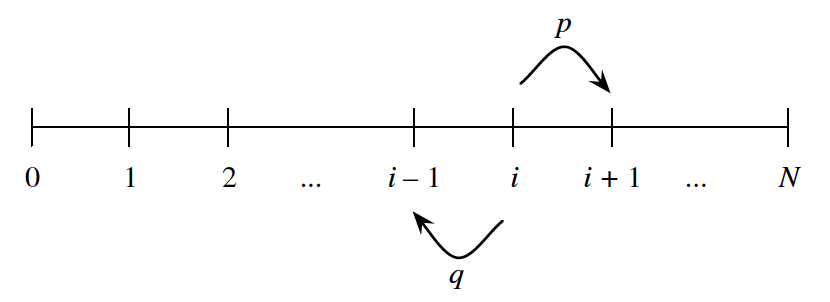

Solución:

Reconocemos que este juego tiene una estructura recursiva: después del primer paso, la riqueza de A es ahora $i + 1$ o $i - 1$. Sea $p_i$ la probabilidad de que A gane el juego, dado que A comienza con $i$ dólares. Usaremos el análisis del primer paso para resolver para las $p_i$. Sea $W$ el evento de que A gane el juego. Por LOTP, condicionando sobre el resultado de la primera ronda, tenemos:

$$p_i = P(W|A \text{ comienza en } i, \text{ gana ronda 1}) \cdot p + P(W|A \text{ comienza en } i, \text{ pierde ronda 1}) \cdot q$$

$$= P(W|A \text{ comienza en } i + 1) \cdot p + P(W|A \text{ comienza en } i - 1) \cdot q$$

$$= p_{i+1} \cdot p + p_{i-1} \cdot q$$

Esto debe ser cierto para todo $i$ desde 1 hasta $N-1$, y también tenemos las condiciones de frontera $p_0 = 0$ y $p_N = 1$. Ahora podemos resolver esta ecuación, llamada ecuación en diferencias, para obtener las $p_i$.

La ecuación característica de la ecuación en diferencias es $px^2 - x + q = 0$, que tiene raíces 1 y $q/p$. Si $p \neq 1/2$, estas raíces son distintas, y la solución general es:

$$p_i = a \cdot 1^i + b \cdot \left(\frac{q}{p}\right)^i$$

Usando las condiciones de frontera $p_0 = 0$ y $p_N = 1$, obtenemos:

$$a = -b = \frac{1}{1 - \left(\frac{q}{p}\right)^N}$$

y simplemente sustituimos estos valores para obtener la solución específica. Si $p = 1/2$, las raíces del polinomio característico no son distintas, por lo que la solución general es:

$$p_i = a \cdot 1^i + b \cdot i \cdot 1^i$$

Las condiciones de frontera dan $a = 0$ y $b = 1/N$.

En resumen, la probabilidad de que A gane con una riqueza inicial de $i$ es:

$$p_i = \begin{cases}
\frac{1 - \left(\frac{q}{p}\right)^i}{1 - \left(\frac{q}{p}\right)^N} & \text{si } p \neq \frac{1}{2} \\
\frac{i}{N} & \text{si } p = \frac{1}{2}
\end{cases}$$

El caso $p = 1/2$ es consistente con el caso $p \neq 1/2$, en el sentido de que:

$$\lim_{p \to 1/2} \frac{1 - \left(\frac{q}{p}\right)^i}{1 - \left(\frac{q}{p}\right)^N} = \frac{i}{N}$$

Para ver esto, sea $x = q/p$ y sea $x$ que se aproxima a 1. Por la regla de L'Hôpital:

$$\lim_{x \to 1} \frac{1 - x^i}{1 - x^N} = \lim_{x \to 1} \frac{ix^{i-1}}{Nx^{N-1}} = \frac{i}{N}$$

La respuesta para el caso $p = 1/2$ tiene una interpretación simple: la probabilidad de que A gane es igual a la proporción de la riqueza con la que A comienza. Entonces, si $p = 1/2$ y A comienza con mucho menos dinero que B, entonces la probabilidad de que A gane el juego es baja. Tener $p < 1/2$ también puede hacer que la probabilidad de que A gane sea baja, incluso si $p$ es solo un poco menor que $1/2$ y los jugadores comienzan con la misma cantidad de dinero. Por ejemplo, si $p = 0.49$ y cada jugador comienza con $100 dólares, entonces A tiene solo aproximadamente un 1.8% de probabilidad de ganar el juego.

Nos hemos enfocado en la probabilidad de que A gane el juego, pero ¿qué pasa con B? En lugar de comenzar desde cero, podemos usar simetría: aparte de la notación, no hay nada en la descripción del juego que distinga a A de B. Por simetría, la probabilidad de que B gane desde una riqueza inicial de $N - i$ se obtiene intercambiando los roles de $q$ y $p$, y de $i$ y $N - i$. Esto da:

$$P(B \text{ gana}|B \text{ comienza en } N - i) = \begin{cases}
\frac{1 - \left(\frac{p}{q}\right)^{N-i}}{1 - \left(\frac{p}{q}\right)^N} & \text{si } p \neq \frac{1}{2} \\
\frac{N-i}{N} & \text{si } p = \frac{1}{2}
\end{cases}$$

Entonces puede verificarse que para todo $i$ y todo $p$, $P(A \text{ gana}) + P(B \text{ gana}) = 1$, por lo que el juego está garantizado a terminar: la probabilidad es 0 de que oscile para siempre.

En este problema, podríamos estar muy interesados en cuánta riqueza tiene cada jugador en un momento particular. Así que podríamos inventar notación como dejar que $A_{jk}$ sea el evento de que el jugador A tenga exactamente $j$ dólares después de $k$ rondas, y de manera similar definir un evento $B_{jk}$ para el jugador B, para todos $j$ y $k$.

Esto ya es demasiado complicado. Además, también podríamos estar interesados en otras cantidades, como la diferencia en sus riquezas (la del jugador A menos la del jugador B) después de $k$ rondas, o la duración del juego (el número de rondas hasta que un jugador queda en bancarrota). Expresar el evento "la duración del juego es $r$ rondas" en términos de los $A_{jk}$ y $B_{jk}$ involucraría una larga y torpe cadena de uniones e intersecciones. ¿Y qué pasaría si quisiéramos expresar la riqueza del jugador A como la cantidad equivalente en euros en lugar de dólares? Podemos multiplicar un número en dólares por un tipo de cambio de moneda, pero no podemos multiplicar un evento por un tipo de cambio.

En lugar de tener notación complicada que oscurece cómo se relacionan las cantidades de interés, ¿no sería bueno si pudiéramos decir algo como lo siguiente?

Sea $X_k$ la riqueza del jugador A después de $k$ rondas. Entonces $Y_k = N - X_k$ es la riqueza del jugador B después de $k$ rondas (donde $N$ es la riqueza total fija); $X_k - Y_k = 2X_k - N$ es la diferencia en riquezas después de $k$ rondas; $c_k X_k$ es la riqueza del jugador A en euros después de $k$ rondas, donde $c_k$ es el tipo de cambio euros por dólar después de $k$ rondas; y la duración es $R = \min\{n : X_n = 0 \text{ o } Y_n = 0\}$.

¡La noción de una variable aleatoria nos permitirá hacer exactamente esto! Sin embargo, necesita ser introducida cuidadosamente, para hacerla tanto conceptual como técnicamente correcta. A veces se da una definición de "variable aleatoria" que es una versión apenas parafraseada de "una variable aleatoria es una variable que toma valores aleatorios", pero tal débil intento de definición no logra decir de dónde viene la aleatoriedad. Tampoco nos ayuda a derivar propiedades de las variables aleatorias: estamos familiarizados con trabajar con ecuaciones algebraicas como $x^2 + y^2 = 1$, pero ¿cuáles son las operaciones matemáticas válidas si $x$ e $y$ son variables aleatorias? Para hacer precisa la noción de variable aleatoria, la definimos como una función que mapea el espacio muestral a la recta real.

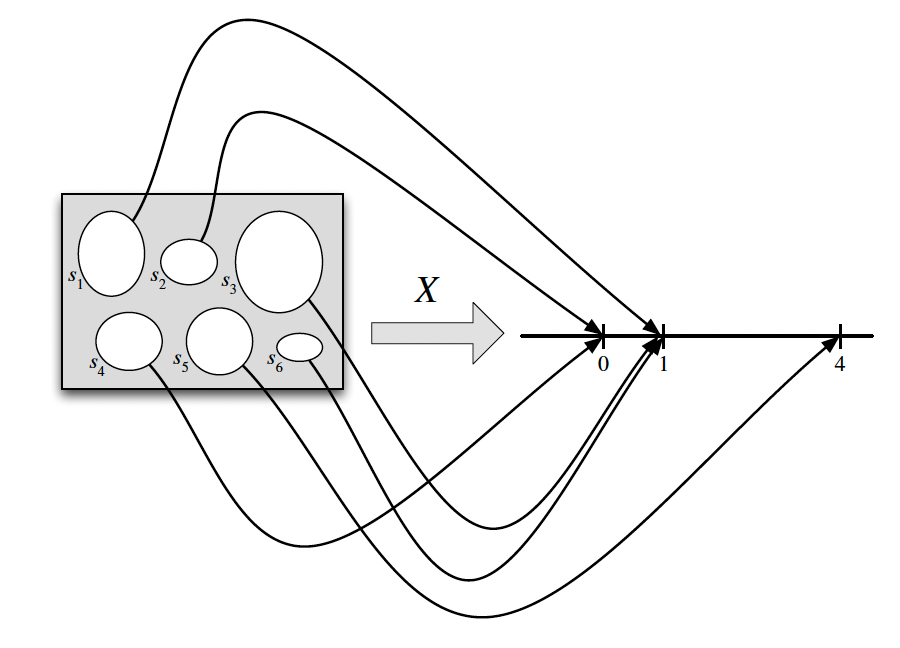

> *Figura 3.1.* Una variable aleatoria mapea el espacio muestral a la recta real. La v.a. $X$ representada aquí está definida sobre un espacio muestral con 6 elementos, y tiene valores posibles 0, 1 y 4. La aleatoriedad proviene de elegir una piedra aleatoria de acuerdo con la función de probabilidad $P$ para el espacio muestral.

Definición 3.1.1 (Variable aleatoria). Dado un experimento con espacio muestral $S$, una variable aleatoria (v.a.) es una función del espacio muestral $S$ a los números reales $\mathbb{R}$. Es común, pero no requerido, denotar las variables aleatorias con letras mayúsculas.

Así, una variable aleatoria $X$ asigna un valor numérico $X(s)$ a cada resultado posible $s$ del experimento. La aleatoriedad proviene del hecho de que tenemos un experimento aleatorio (con probabilidades descritas por la función de probabilidad $P$); el mapeo en sí mismo es determinista, como se ilustra en la Figura 3.1. La misma v.a. se muestra de una manera más simple en el panel izquierdo de la Figura 3.2, en el que inscribimos los valores dentro de las piedras.

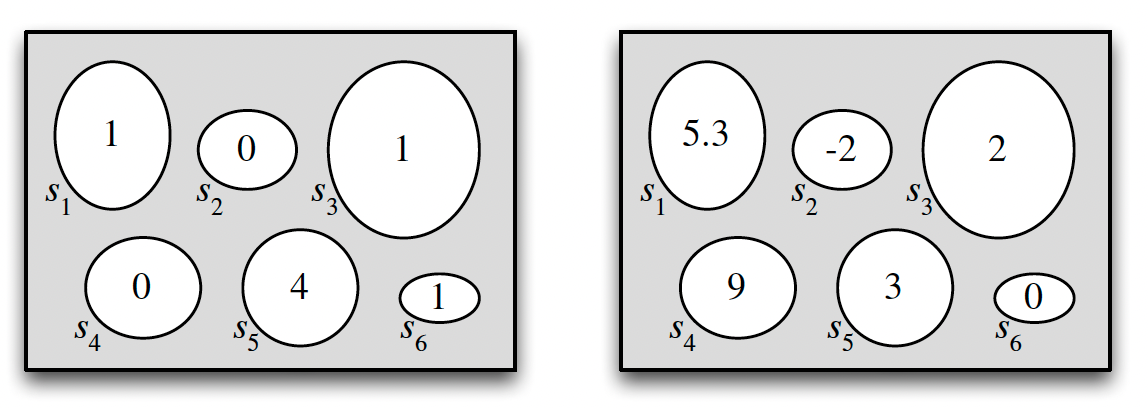

> *Figura 3.2* Dos variables aleatorias definidas sobre el mismo espacio muestral.

Esta definición es abstracta pero fundamental; una de las habilidades más importantes a desarrollar cuando se estudia probabilidad y estadística es la capacidad de ir y venir entre ideas abstractas y ejemplos concretos. De manera relacionada, es importante trabajar en reconocer el patrón esencial o la estructura de un problema y cómo se conecta con problemas que has estudiado previamente. A menudo discutiremos historias que involucran lanzar monedas o sacar bolas de urnas porque son escenarios simples y convenientes para trabajar, pero muchos otros problemas son isomorfos: tienen la misma estructura esencial, pero con una apariencia diferente.

Para comenzar, consideremos un ejemplo de lanzamiento de monedas. La estructura del problema es que tenemos una secuencia de ensayos donde hay dos resultados posibles para cada ensayo. Aquí pensamos en los resultados posibles como C (Cara) y X (Cruz), pero igualmente podríamos pensar en ellos como "éxito" y "fracaso" o como 1 y 0, por ejemplo.

Ejemplo 3.1.2 (Lanzamientos de moneda). Consideremos un experimento donde lanzamos una moneda justa dos veces. El espacio muestral consiste en cuatro resultados posibles: $S = \{CC, CX, XC, XX\}$. Aquí hay algunas variables aleatorias en este espacio (para practicar, puedes inventar algunas propias). Cada v.a. es un resumen numérico de algún aspecto del experimento.

Sea $X$ el número de Caras. Esta es una variable aleatoria con valores posibles 0, 1 y 2. Vista como una función, $X$ asigna el valor 2 al resultado $CC$, 1 a los resultados $CX$ y $XC$, y 0 al resultado $XX$. Es decir,

$$X(CC) = 2; \quad X(CX) = X(XC) = 1; \quad X(XX) = 0$$

Sea $Y$ el número de Cruces. En términos de $X$, tenemos $Y = 2 - X$. En otras palabras, $Y$ y $2 - X$ son la misma v.a.: $Y(s) = 2 - X(s)$ para todo $s$.

Sea $I$ igual a 1 si el primer lanzamiento cae Cara y 0 en caso contrario. Entonces $I$ asigna el valor 1 a los resultados $CC$ y $CX$ y 0 a los resultados $XC$ y $XX$. Esta v.a. es un ejemplo de lo que se llama una variable aleatoria indicadora ya que indica si el primer lanzamiento cae Cara, usando 1 para significar "sí" y 0 para significar "no".

También podemos codificar el espacio muestral como $\{(1,1), (1,0), (0,1), (0,0)\}$, donde 1 es el código para Cara y 0 es el código para Cruz. Entonces podemos dar fórmulas explícitas para $X$, $Y$, $I$:

$$X(s_1, s_2) = s_1 + s_2; \quad Y(s_1, s_2) = 2 - s_1 - s_2; \quad I(s_1, s_2) = s_1$$

donde por simplicidad escribimos $X(s_1, s_2)$ para significar $X((s_1, s_2))$, etc.

Para entender lo anterior, hay que tener en cuenta que al recodificar los resultados del experimento asignando el valor 1 a Cara y 0 a Cruz, cada resultado puede representarse como un par ordenado $(s_1, s_2)$, donde $s_1$ indica el resultado del primer lanzamiento y $s_2$ el del segundo, de modo que el espacio muestral pasa a ser $S = \{(1,1), (1,0), (0,1), (0,0)\}$. Con esta codificación, la variable aleatoria $X$, que cuenta el número de Caras, se obtiene simplemente sumando los valores de ambos lanzamientos, es decir, $X(s_1, s_2) = s_1 + s_2$; la variable aleatoria $Y$, que cuenta el número de Cruces, se define como el número total de lanzamientos menos el número de Caras, por lo que $Y(s_1, s_2) = 2 - s_1 - s_2$; y la variable aleatoria indicadora $I$, que señala si el primer lanzamiento es Cara, toma el valor del primer componente del par, esto es, $I(s_1, s_2) = s_1$. Estas relaciones pueden verse claramente en la siguiente tabla:

| Resultado | $(s_1, s_2)$ | $X = s_1 + s_2$ | $Y = 2 - s_1 - s_2$ | $I = s_1$ |
|----------|----------------|------------------|----------------------|-------------|
| CC       | (1,1)          | 2                | 0                    | 1           |
| CX       | (1,0)          | 1                | 1                    | 1           |
| XC       | (0,1)          | 1                | 1                    | 0           |
| XX       | (0,0)          | 0                | 2                    | 0           |


Para la mayoría de las v.a. que consideraremos, es tedioso o inviable escribir una fórmula explícita de esta manera. Afortunadamente, usualmente es innecesario hacerlo, ya que (como vimos en este ejemplo) hay otras formas de definir una v.a., y hay muchas maneras de estudiar las propiedades de una v.a. aparte de hacer cálculos con una fórmula explícita de a qué mapea cada resultado $s$.

Para un espacio muestral con un número finito de resultados, podemos visualizar los resultados como piedras, donde la masa de una piedra corresponde a su probabilidad, tal que la masa total de las piedras es 1. Una variable aleatoria simplemente etiqueta cada piedra con un número. La Figura 3.2 muestra dos variables aleatorias definidas sobre el mismo espacio muestral: las piedras o resultados son los mismos, pero los números reales asignados a los resultados son diferentes.

Como mencionamos anteriormente, la fuente de la aleatoriedad en una variable aleatoria es el experimento mismo, en el cual un resultado muestral $s \in S$ es elegido de acuerdo con una función de probabilidad $P$. Antes de realizar el experimento, el resultado $s$ aún no se ha realizado, por lo que no conocemos el valor de $X$, aunque podríamos calcular la probabilidad de que $X$ tome un valor dado o un rango de valores. Después de realizar el experimento y el resultado $s$ se ha realizado, la variable aleatoria se cristaliza en el valor numérico $X(s)$.

Las variables aleatorias proporcionan resúmenes numéricos del experimento en cuestión. Esto es muy útil porque el espacio muestral de un experimento es a menudo increíblemente complicado o de alta dimensión, y los resultados $s \in S$ pueden ser no numéricos. Por ejemplo, el experimento puede ser recolectar una muestra aleatoria de personas en una ciudad determinada y hacerles varias preguntas, que pueden tener respuestas numéricas (por ejemplo, edad o altura) o no numéricas (por ejemplo, partido político o película favorita). El hecho de que las v.a. tomen valores numéricos es una simplificación muy conveniente en comparación con tener que trabajar con la complejidad completa de $S$ en todo momento.

## 3.2. Distribuciones y funciones de masa de probabilidad

Hay dos tipos principales de variables aleatorias usadas en la práctica: v.a. discretas y v.a. continuas. En este notebook y el siguiente, nuestro enfoque está en las v.a. discretas. Las v.a. continuas se introducen en un notebook futuro.

Definición 3.2.1 (Variable aleatoria discreta). Se dice que una variable aleatoria $X$ es discreta si existe una lista finita de valores $a_1, a_2, \ldots, a_n$ o una lista infinita de valores $a_1, a_2, \ldots$ tal que $P(X = a_j \text{ para algún } j) = 1$. Si $X$ es una v.a. discreta, entonces el conjunto finito o contablemente infinito de valores $x$ tal que $P(X = x) > 0$ se llama el soporte de $X$.

Más comúnmente en aplicaciones, el soporte de una v.a. discreta es un conjunto de enteros. En contraste, una v.a. continua puede tomar cualquier valor real en un intervalo (posiblemente incluso toda la recta real); tales v.a. se definen con más precisión en cuadernos posteriores. También es posible tener una v.a. que sea un híbrido de discreta y continua, como por ejemplo lanzar una moneda y luego generar una v.a. discreta si la moneda cae Cara y generar una v.a. continua si la moneda cae Cruz. Pero el punto de partida para entender tales v.a. es entender las v.a. discretas y continuas.

Dada una variable aleatoria, nos gustaría poder describir su comportamiento usando el lenguaje de la probabilidad. Por ejemplo, podríamos querer responder preguntas sobre la probabilidad de que la v.a. caiga en un rango dado: si $L$ son las ganancias de por vida de un graduado universitario estadounidense elegido al azar, ¿cuál es la probabilidad de que $L$ exceda un millón de dólares? Si $M$ es el número de terremotos mayores en California en los próximos cinco años, ¿cuál es la probabilidad de que $M$ sea igual a 0?

La distribución de una variable aleatoria proporciona las respuestas a estas preguntas; especifica las probabilidades de todos los eventos asociados con la v.a., como la probabilidad de que sea igual a 3 y la probabilidad de que sea al menos 110. Veremos que hay varias formas equivalentes de expresar la distribución de una v.a. Para una v.a. discreta, la forma más natural de hacerlo es con una función de masa de probabilidad, que ahora definimos.

Definición 3.2.2 (Función de masa de probabilidad). La función de masa de probabilidad (PMF, por sus siglas en inglés) de una v.a. discreta $X$ es la función $p_X$ dada por $p_X(x) = P(X = x)$. Nótese que esto es positivo si $x$ está en el soporte de $X$, y 0 en caso contrario.

Advertencia 3.2.3. Al escribir $P(X = x)$, estamos usando $X = x$ para denotar un evento, consistente de todos los resultados $s$ a los cuales $X$ asigna el número $x$. Este evento también se escribe como $\{X = x\}$; formalmente, $\{X = x\}$ se define como $\{s \in S : X(s) = x\}$, pero escribir $\{X = x\}$ es más corto y más intuitivo. Volviendo al Ejemplo 3.1.2, si $X$ es el número de Caras en dos lanzamientos de moneda justa, entonces $\{X = 1\}$ consiste en los resultados muestrales $CX$ y $XC$, que son los dos resultados a los cuales $X$ asigna el número 1. Dado que $\{CX, XC\}$ es un subconjunto del espacio muestral, es un evento. Entonces tiene sentido hablar de $P(X = 1)$, o más generalmente, $P(X = x)$. Si $\{X = x\}$ fuera cualquier cosa que no sea un evento, ¡no tendría sentido calcular su probabilidad! No tiene sentido escribir "$P(X)$"; solo podemos tomar la probabilidad de un evento, no de una v.a.

Veamos algunos ejemplos de PMFs.

Ejemplo 3.2.4 (Lanzamientos de moneda continuación). En este ejemplo encontraremos las PMFs de todas las variables aleatorias en el Ejemplo 3.1.2, el ejemplo con dos lanzamientos de moneda justa. Aquí están las v.a. que definimos, junto con sus PMFs:

* $X$, el número de Caras. Dado que $X$ es igual a 0 si ocurre $XX$, 1 si ocurre $CX$ o $XC$, y 2 si ocurre $CC$, la PMF de $X$ es la función $p_X$ dada por

$$p_X(0) = P(X = 0) = \frac{1}{4}$$
$$p_X(1) = P(X = 1) = \frac{1}{2}$$
$$p_X(2) = P(X = 2) = \frac{1}{4}$$

y $p_X(x) = 0$ para todos los otros valores de $x$.

* $Y = 2 - X$, el número de Cruces. Razonando como arriba o usando el hecho de que

$$P(Y = y) = P(2 - X = y) = P(X = 2 - y) = p_X(2 - y)$$

la PMF de $Y$ es

$$p_Y(0) = P(Y = 0) = \frac{1}{4}$$
$$p_Y(1) = P(Y = 1) = \frac{1}{2}$$
$$p_Y(2) = P(Y = 2) = \frac{1}{4}$$

y $p_Y(y) = 0$ para todos los otros valores de $y$.

Nótese que $X$ e $Y$ tienen la misma PMF (es decir, $p_X$ y $p_Y$ son la misma función) aunque $X$ e $Y$ no son la misma v.a. (es decir, $X$ e $Y$ son dos funciones diferentes de $\{CC, CX, XC, XX\}$ a la recta real).

* $I$, el indicador del primer lanzamiento cayendo Cara. Dado que $I$ es igual a 0 si ocurre $XC$ o $XX$ y 1 si ocurre $CC$ o $CX$, la PMF de $I$ es

$$p_I(0) = P(I = 0) = \frac{1}{2}$$
$$p_I(1) = P(I = 1) = \frac{1}{2}$$

y $p_I(i) = 0$ para todos los otros valores de $i$.

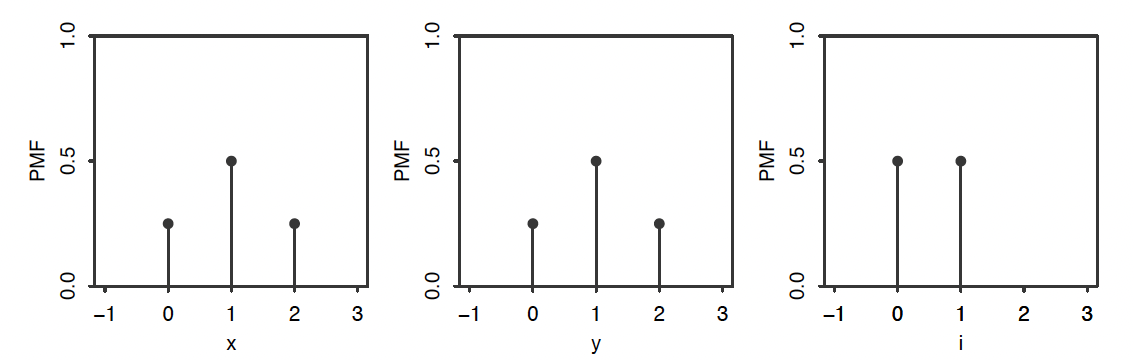

> *Figura 3.3.* De izquierda a derecha: PMFs de $X$, $Y$ e $I$, donde $X$ es el número de Caras en dos lanzamientos de moneda justa, $Y$ es el número de Cruces, e $I$ es el indicador de Cara en el primer lanzamiento.

Las PMFs de $X$, $Y$ e $I$ se grafican en la Figura 3.3. Se dibujan barras verticales para facilitar la comparación de las alturas de diferentes puntos.

Ejemplo 3.2.5 (Suma de tiradas de dados). Lanzamos dos dados justos de 6 caras. Sea $T = X + Y$ el total de las dos tiradas, donde $X$ e $Y$ son las tiradas individuales. El espacio muestral de este experimento tiene 36 resultados igualmente probables:

$$S = \{(1,1), (1,2), \ldots, (6,5), (6,6)\}$$

Por ejemplo, 7 de los 36 resultados $s$ se muestran en la tabla siguiente, junto con los valores correspondientes de $X$, $Y$ y $T$. Después de realizar el experimento, observamos valores para $X$ e $Y$, y luego el valor observado de $T$ es la suma de esos valores.

| $s$ | $X$ | $Y$ | $X + Y$ |
|---------|-----|-----|---------|
| (1,2)   | 1   | 2   | 3       |
| (1,6)   | 1   | 6   | 7       |
| (2,5)   | 2   | 5   | 7       |
| (3,1)   | 3   | 1   | 4       |
| (4,3)   | 4   | 3   | 7       |
| (5,4)   | 5   | 4   | 9       |
| (6,6)   | 6   | 6   | 12      |

Dado que los dados son justos, la PMF de $X$ es

$$P(X = j) = \frac{1}{6}$$

para $j = 1, 2, \ldots, 6$ (y $P(X = j) = 0$ en caso contrario); decimos que $X$ tiene una distribución Uniforme Discreta en $1, 2, \ldots, 6$. De manera similar, $Y$ también es Uniforme Discreta en $1, 2, \ldots, 6$. Nótese que $Y$ tiene la misma distribución que $X$ pero no es la misma variable aleatoria que $X$. De hecho, tenemos

$$P(X = Y) = \frac{6}{36} = \frac{1}{6}$$

Dos v.a. más en este experimento con la misma distribución que $X$ son $7 - X$ y $7 - Y$. Para ver esto, podemos usar el hecho de que para un dado estándar, $7 - X$ es el valor en la cara inferior si $X$ es el valor en la cara superior. Si el valor superior es igualmente probable que sea cualquiera de los números $1, 2, \ldots, 6$, entonces también lo es el valor inferior. Nótese que aunque $7 - X$ tiene la misma distribución que $X$, ¡nunca es igual a $X$ en una realización del experimento!

Ahora encontremos la PMF de $T$. Por la definición ingenua de probabilidad,

$$P(T = 2) = P(T = 12) = \frac{1}{36}$$
$$P(T = 3) = P(T = 11) = \frac{2}{36}$$
$$P(T = 4) = P(T = 10) = \frac{3}{36}$$
$$P(T = 5) = P(T = 9) = \frac{4}{36}$$
$$P(T = 6) = P(T = 8) = \frac{5}{36}$$
$$P(T = 7) = \frac{6}{36}$$

Para todos los otros valores de $t$, $P(T = t) = 0$. Podemos ver directamente que el soporte de $T$ es $\{2, 3, \ldots, 12\}$ solo mirando los totales posibles para dos dados, pero como verificación, notamos que

$$P(T = 2) + P(T = 3) + \cdots + P(T = 12) = 1$$

lo que muestra que todas las posibilidades han sido contabilizadas. La propiedad de simetría de $T$ que aparece arriba, $P(T = t) = P(T = 14 - t)$, tiene sentido ya que cada resultado $\{X = x, Y = y\}$ que hace que $T = t$ tiene un resultado correspondiente $\{X = 7 - x, Y = 7 - y\}$ de la misma probabilidad que hace que $T = 14 - t$.

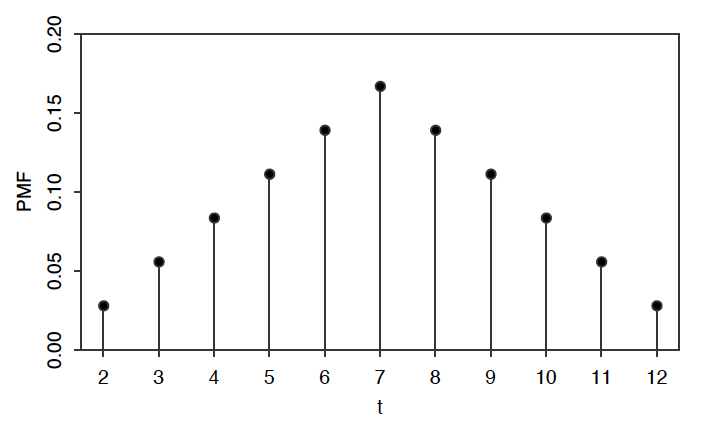

> *Figura 3.4.* PMF de la suma de dos tiradas de dados.

La PMF de $T$ se grafica en la Figura 3.4; tiene una forma triangular, y la simetría mencionada anteriormente es muy visible.